In [2]:
from collections import defaultdict
from collections import OrderedDict
import os
import pandas as pd
import re
#import nltk
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
import string
#from unidecode import unidecode
import csv
#from bs4 import BeautifulSoup, Tag
import sys
import json
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
NUM_TOP_WORDS = 20 # The number of top words that we want from each file
CONTEXT_WORDS_AROUND = 50
MAX_EXCLUDE_REGEX_LENGTH = 50
punctuation = ['\.', '/', '\?', '\-', '"', ',', '\\b'] # Punctuation we use within our regexes
data_dirname = os.getcwd() + "/data/"

In [4]:
df = pd.read_csv(os.path.join("data", "k.csv"))

In [34]:
indexNames = df[ (df['RAPE '] == 'NaN') | (df['RAPE '] == '') | (df['RAPE '] == '\n')].index

In [35]:
df.drop(indexNames, inplace=False).head(20)

,SEX,SEX_COMMENTS,RAPE,RAPE_COMMENTS,RAPE_EXCLUDE,DATING,DATING_COMMENTS,PREGNANCY,PREGNANCY_COMMENTS,BIRTH_CONTROL,...,LESBIAN,LESBIAN_COMMENTS,DOMESTIC_VIOLENCE_GENDER_VIOLENCE,DOMESTIC_VIOLENCE_COMMENTS,STOP_THE_TAPE,STOP_THE_TAPE COMMENTS,SEXUAL_BEHAVIOR,SEXUAL_BEHAVIOR COMMENTS,MISOGYNY,MISOGYNY COMMENTS
1,sexual,NaN,raped,NaN,NaN,courtship,NaN,fetus,NaN,contraception,...,homosexual,NaN,domestic violence,NaN,"""stop the tape""",ebf 2/5/19,"""hit on her""",added 6/25/2019,sexist,added 6/25/2019
2,sexuality,NaN,raping,NaN,NaN,necking/neck,NaN,unwed mother,NaN,family planning,...,queer,NaN,spouse abuse,NaN,"""turn that thing off""",njms 4/6/19,pervert,added 6/25/2019,sexism,added 6/25/2019
3,NaN,NaN,rapist,NaN,NaN,petting/pet,NaN,illegitimate birth,NaN,abortion,...,gay,NaN,wife abuse,NaN,"""turn the recorder off""",njms 4/6/19,"""sleep with""",added 6/25/2019,double standard,added 6/25/2019
4,NaN,NaN,rapes,NaN,NaN,dating/date,NaN,illegitimacy,NaN,miscarriage,...,Boston marriage,NaN,child abuse,NaN,NaN,NaN,NaN,NaN,misogyn*,added 6/25/2019
5,NaN,NaN,sex* assault*,add: sex* 11/2/2020 meeting sugges...,NaN,passion,NaN,knocked up,NaN,the pill,...,fairy,NaN,battering,maybe too broad?,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,outrage,Most often used to leverage feelings against a...,NaN,love,NaN,bastard,NaN,diaphragm,...,smash*,NaN,abusive spouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,attack,"Often used in the phrase ""heart attack"", or in...","heart attack; ""attack on Pearl Harbor""; ""panic...",engagement,NaN,"""family way""",NaN,rubber,...,crush,NaN,abusive husband,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,insult,Used most often to denote outrage of an insult...,"""insult to injury"" ebf 7/3/19",going steady,NaN,NaN,NaN,condom,...,transsexual,NaN,abusive father,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,ravish,do ravish terms yield anything?,NaN,marriage,NaN,NaN,NaN,withdrawal,...,trans,NaN,abuser,njms added 4/1/2019,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,ravished,NaN,NaN,parietal,NaN,NaN,NaN,rhythm method,...,butch,NaN,wife beater,njms added 4/1/2019,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Get indexes where name column has value john

 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [21]:
df

,SEX,SEX_COMMENTS,RAPE,RAPE_COMMENTS,RAPE_EXCLUDE,DATING,DATING_COMMENTS,PREGNANCY,PREGNANCY_COMMENTS,BIRTH_CONTROL,...,LESBIAN,LESBIAN_COMMENTS,DOMESTIC_VIOLENCE_GENDER_VIOLENCE,DOMESTIC_VIOLENCE_COMMENTS,STOP_THE_TAPE,STOP_THE_TAPE COMMENTS,SEXUAL_BEHAVIOR,SEXUAL_BEHAVIOR COMMENTS,MISOGYNY,MISOGYNY COMMENTS
0,sex,NaN,rape,added back klm 1/28 re: ebf comments 1/24,NaN,kiss,NaN,pregnancy,NaN,birth control,...,lesbian,NaN,battered,"maybe make narrower, e.g. ""battered woman"" or ...","""turn off the tape""",ebf 2/5/19,"""hit on me""",added 6/25/2019,chauvinis*,added 6/25/2019
1,sexual,NaN,raped,NaN,NaN,courtship,NaN,fetus,NaN,contraception,...,homosexual,NaN,domestic violence,NaN,"""stop the tape""",ebf 2/5/19,"""hit on her""",added 6/25/2019,sexist,added 6/25/2019
2,sexuality,NaN,raping,NaN,NaN,necking/neck,NaN,unwed mother,NaN,family planning,...,queer,NaN,spouse abuse,NaN,"""turn that thing off""",njms 4/6/19,pervert,added 6/25/2019,sexism,added 6/25/2019
3,NaN,NaN,rapist,NaN,NaN,petting/pet,NaN,illegitimate birth,NaN,abortion,...,gay,NaN,wife abuse,NaN,"""turn the recorder off""",njms 4/6/19,"""sleep with""",added 6/25/2019,double standard,added 6/25/2019
4,NaN,NaN,rapes,NaN,NaN,dating/date,NaN,illegitimacy,NaN,miscarriage,...,Boston marriage,NaN,child abuse,NaN,NaN,NaN,NaN,NaN,misogyn*,added 6/25/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NaN,NaN,abusive,"8/6 ebf found ""sexually abusive"" in HM, not pi...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,sex offender,8/7 ebf,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,fellat*,"8/6 [see Morse, charlotte, Little Susie [sic]...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df['RAPE '].dropna()

0                         rape
1                        raped
2                       raping
3                       rapist
4                        rapes
5                sex* assault*
6                      outrage
7                       attack
8                       insult
9                       ravish
10                    ravished
11                     harass*
12                  sex* abuse
13                      seduce
14                   seduction
16      "took advantage of me"
17     "took advantage of her"
19               sex* violence
20                 hanky panky
22                     incest*
23                   anti-rape
26                  pedophilia
27                   pedophile
28                            
29                     molest*
38                "Anita Hill"
39           "Clarence Thomas"
47                   sodomized
48                      sodomy
49       "interfered with her"
53                      fondle
54                    fondling
55      

In [40]:
df1 = df['RAPE '].dropna()
df1

0                         rape
1                        raped
2                       raping
3                       rapist
4                        rapes
5                sex* assault*
6                      outrage
7                       attack
8                       insult
9                       ravish
10                    ravished
11                     harass*
12                  sex* abuse
13                      seduce
14                   seduction
16      "took advantage of me"
17     "took advantage of her"
19               sex* violence
20                 hanky panky
22                     incest*
23                   anti-rape
26                  pedophilia
27                   pedophile
28                            
29                     molest*
38                "Anita Hill"
39           "Clarence Thomas"
47                   sodomized
48                      sodomy
49       "interfered with her"
53                      fondle
54                    fondling
55      

In [44]:
kwlist = [w.strip("\" ") for w in list(df1) if not w.isspace()]
kwstring = ",".join(kwlist)

In [45]:
kwstring

"rape,raped,raping,rapist,rapes,sex* assault*,outrage,attack,insult,ravish,ravished,harass*,sex* abuse,seduce,seduction,took advantage of me,took advantage of her,sex* violence,hanky panky,incest*,anti-rape,pedophilia,pedophile,molest*,Anita Hill,Clarence Thomas,sodomized,sodomy,interfered with her,fondle,fondling,fondled,pinched,sexual violation,statutory offense,playboy,lady's man,ladies man,ladies' man,brutalized,child abuse,sexually inappropriate,Title IX,abusive,sex offender,fellat*,bestial*"

In [46]:
with open("keywords1.txt", "w") as text_file:
    text_file.write(kwstring)

In [52]:
TRANSCRIPTS_RELFP = os.path.join("data", "corpus-files")
METADATA_RELFP = os.path.join("data", "metadata")

KEYWORD_RELFP = os.path.join("data", "keywords1.txt")






In [53]:
#get key words into a list
#TODO why do some kws begin with a space, e.g. " assault"--is this significant for search, or a typo?
#TODO interpret kws as regexes
kw_str = ""
with open(KEYWORD_RELFP, "r") as f:
    kw_str = f.read()

    
#TODO: THIS IS WRONG! splits, for example, "sex* assault" into two key words
keywords = kw_str.split(",")
keywords = keywords[:-1] #remove final "" keyword

#prepare for 
keywords_wrapper = [ 
    {"include":keywords, "exclude":[], "version":"v1", "name":"rape-keywords", "date-added":"today"}
]

FileNotFoundError: [Errno 2] No such file or directory: 'data/keywords1.txt'

46

In [62]:
keywords

[{'include': ['sexually inappropriate',
   'took advantage of her',
   'took advantage of me',
   'interfered with her',
   'statutory offense',
   'sexual violation',
   'Clarence Thomas',
   'sex* violence',
   'sex* assault*',
   'sex offender',
   "ladies' man",
   'hanky panky',
   'child abuse',
   'sex* abuse',
   'pedophilia',
   "lady's man",
   'ladies man',
   'brutalized',
   'Anita Hill',
   'sodomized',
   'seduction',
   'pedophile',
   'anti-rape',
   'ravished',
   'fondling',
   'Title IX',
   'playboy',
   'pinched',
   'outrage',
   'molest*',
   'incest*',
   'harass*',
   'fondled',
   'fellat*',
   'abusive',
   'sodomy',
   'seduce',
   'ravish',
   'rapist',
   'raping',
   'insult',
   'fondle',
   'attack',
   'rapes',
   'raped',
   'rape'],
  'exclude': [],
  'version': 'v1',
  'name': 'rape-keywords',
  'date-added': 'today',
  'included_regexes': ['(?:\\.|/|\\?|\\-|"|,|\\b)(sexually inappropriate)(?:\\.|/|\\?|\\-|"|,|\\b)',
   '(?:\\.|/|\\?|\\-|"|,|\\b)(t

In [55]:
##generic utility functions

# Prints out a JSON string that is then read by the Node.js backend.
def print_message(_type, content):
	message = {
		"type": _type,
		"content": content
	}
	print(json.dumps(message))


In [105]:
##helpers called in set_up

currRun = {
	"ID": '',
	"name": '',
	"time": '',
	"collections": [""],
	"interviews": "",
	"interviewees":"",
	"keywordList": [],
	"total": 0 # Progress of the run
};

data = {
		"id": currRun["ID"],
		"name": currRun["name"],
		"date": currRun["time"],
		"interviews": "OHTAP_metadata_interviews.csv",
		"interviewees": "OHTAP_metadata_interviewees.csv",
        "collections": [{"id": "HM - History Makers"}],
		#"collections": [{"id": "HM - History Makers"}, {"id": "ROHA - Rutgers Oral History Archives"}, {"id": "RTRB - Rosie The Riveter WWII American Homefront Project - Bancroft"}],
        #"collections": [{"id": "ROHA - Rutgers Oral History Archives"}],
	    "keywordList": keywords_wrapper
	};



# Reads in arguments into the directories, words, and metadata file needed for the runs.
def read_arguments():
	print_message("progress_message", "Reading in run data...")
    
    


	runId = data['id']
	runName = data['name']
	runDate = data['date']
	collections = data['collections']
	keywords = data['keywordList']
	metadata_file_interviews = data['interviews']
	metadata_file_interviewees= data['interviewees']

	print_message("progress", 4)

	return runId, runName, runDate, collections, keywords, metadata_file_interviews, metadata_file_interviewees



# Creates a new folder to store the final data for the current run.
def create_run_directory(runId):
	print_message("progress-message", "Creating a directory to store run results...")
	dirname = data_dirname + "runs/" + runId
	os.mkdir(dirname)
	print_message("progress", 5)

	return dirname


# Converts the keyword list to Python regex form. Returns the full list of words and the
# included and excluded regexes.
def convert_keywords(keywords):
	converted_keywords = []

	for k in keywords:
		# Sorts the included words backwards to make sure we get the longer words first
		included_words = k["include"]
		included_words = sorted(included_words, key=lambda l: (len(l), l), reverse=True)
		punc = get_punctuation_for_regex(punctuation)
		included_regexes = []
		for w in included_words:
			r = r'(?:{})({})(?:{})'.format(punc, w.replace("*", "[a-zA-Z]*"), punc)
			included_regexes.append(r)

		excluded_words = k["exclude"]
		excluded_regexes = []
		for w in excluded_words:
			r = r"\b{}\b".format(w.replace("*", "[a-zA-Z]*"))
			excluded_regexes.append(w)

		k["included_regexes"] = included_regexes
		k["include"] = included_words
		k["excluded_regexes"] = excluded_regexes
		converted_keywords.append(k)
	return converted_keywords


# Gets punctuation joined by bars (this is punctuation that we decide to count as separation!)
def get_punctuation_for_regex(punc):
	return "|".join(punc)

# Reads all the text from each text file in the corpus directory. TODO: Resolve utf-8.
def read_corpuses(collections):
	new_collections = []
	for c in collections:
		directory = data_dirname + "corpus-files/" + c["id"]
		filenames = []
		content = []

		for file in os.listdir(directory):
			if ".txt" not in file: continue
			filenames.append(file)

			# "ISO-8859-1" encoding otherwise?
			with open("{}/{}".format(directory, file), "r", encoding = "utf-8", errors = "ignore") as f:
				content.append(f.read())

		c["filenames"] = filenames
		c["content"] = content
		new_collections.append(c)

	return new_collections



# Reads in the metadata to collect statistics and excludes any files that are only male
# interviewees or interviews with no transcripts for each collection.
def read_metadata(collections, metadata_file_interviews, metadata_file_interviewees, runJSON):
	df1 = pd.read_csv(data_dirname + "metadata-files/" + metadata_file_interviews, encoding = "utf-8", header = 0)
	df2 = pd.read_csv(data_dirname + "metadata-files/" + metadata_file_interviewees, encoding = "utf-8", header = 0)
	return get_included_files(collections, df1, df2, runJSON)


# Gets the files for inclusion--excludes any files that are only male interviewees or
# interviews with no transcripts.
def get_included_files(collections, df1, df2, runJSON):
	files_for_inclusion = {} # Final list of files for inclusion

	# Statistics about file inclusion/exclusion
	num_files_no_transcript = {} # Total number of files in collection with no transcript
	people = {} # Information about individual people (only "Sex" == "Female" and "Sex" == "Unknown")
	male_interviews = {} # Interviews that include males
	male_plus_interviews = {} # Interviews with both male and non-male interviews
	interview_years = {}
	interview_years_by_file = {}
	total_interviews = 0

	#making a dictionary for the interviewees from id to information
	interviewee_id_to_metadata= defaultdict(lambda:[])

	for i,r in df2.iterrows():
		interviewee_id_to_metadata[r["interviewee_id"]]=r


	# Needed information across all collections
	interview_years_all_collections = defaultdict(lambda:0)
	interviewee_metadata_all_collections = defaultdict(lambda:defaultdict(lambda:0))

	# Statistics about interviewees --> interviews
	interviews_to_interviewees = defaultdict(lambda:[])

	filenames_map = {}
	for c in collections:
		curr_id = c["id"]
		files_for_inclusion[curr_id] = {}
		num_files_no_transcript[curr_id] = 0
		people[curr_id] = {}
		male_interviews[curr_id] = {}
		male_plus_interviews[curr_id] = {}
		interview_years[curr_id] = defaultdict(lambda:0)
		interview_years_by_file = defaultdict(lambda:{})

		for f in c["filenames"]:
			filenames_map[f] = curr_id

	for i, r in df1.iterrows():
		f = r["project_file_name"]

		# Skips files with no project filename (shouldn't happen)
		if pd.isnull(f):
			continue

		# SKips files not in collection
		if f not in filenames_map:
			continue

		curr_c = filenames_map[f]

		# Skips files with no transcript
		no_transcript = r["no_transcript"]
		if not pd.isnull(no_transcript) and no_transcript:
			num_files_no_transcript[curr_c] += 1
			continue

		# If the interviewee is male, marks it and continues (as there may be the same file later on with a non-male interviewee)
		for person_id in r["interviewee_ids"].split(";"):
			interviewee_info =interviewee_id_to_metadata[person_id]
			if  len(interviewee_info) != 0:
				sex = interviewee_info["sex"]
				if not pd.isnull(sex) and sex.strip() == "Male":
					male_interviews[curr_c][f] = 1
					if f in files_for_inclusion:
						male_plus_interviews[curr_c][f] = 1 # Means it contains both male and non-male
					continue


		

		# If the current interviewee is non-male and the interview has a male, mark it
		if f in male_interviews[curr_c]:
			male_plus_interviews[curr_c][f] = 1
			male_interviews[curr_c][f] = 0

		# At this point, we have a new interview (not previously added) with at least one non-male
		# interviewee we want to add!
		interviewees_list= r["interviewee_ids"].split(";")
		for j in interviewees_list:
			info= interviewee_id_to_metadata[j]
			if j==0:
				continue
			interviewee_name = interviewee_id_to_metadata["interviewee_name"]
			interviewee_name= str(interviewee_name)
			interviews_to_interviewees[f].append(j)

			#if interviewee_name not in people:
			birth_decade = info["birth_decade"]
			education = info["education"]
			identified_race = info["identified_race"]
			interviewee_birth_country = info["interviewee_birth_country"]

			curr_person = {}
			curr_person["birth_decade"] = int(birth_decade) if not pd.isnull(birth_decade) and birth_decade.isnumeric() else "Not given"
			curr_person["education"] = education if not pd.isnull(education) else "Not given"
			curr_person["identified_race"] = identified_race if not pd.isnull(identified_race) else "Not given"
			curr_person["sex"] = sex if not pd.isnull(sex) else "Not given"
			curr_person["birth_country"] = interviewee_birth_country if not pd.isnull(interviewee_birth_country) else "Not given"

			people[j] = curr_person

			interviewee_metadata_all_collections["birth_decade"][curr_person["birth_decade"]] += 1
			interviewee_metadata_all_collections["education"][curr_person["education"]] += 1
			interviewee_metadata_all_collections["race"][curr_person["identified_race"]] += 1
			interviewee_metadata_all_collections["sex"][curr_person["sex"]] += 1
			interviewee_metadata_all_collections["birth_country"][curr_person["birth_country"]] += 1
			
			files_for_inclusion[curr_c][f] = 1

			date_of_first_interview = r["date_of_first_interview"]
			if pd.isnull(date_of_first_interview):
				interview_years[curr_c]["Not given"] += 1
				interview_years_by_file[curr_c][f] = "Not given"
				interview_years_all_collections["Not given"] += 1
			else:
				year = date_of_first_interview.split("/")[2]

				# Attempts to fix the two numbered ones; assumes anything that is 00-19 is in 2000s
				if len(year) == 2:
					if int(year) <= 19:
						year = "20{}".format(year)
					else:
						year = "19{}".format(year)

				interview_years[curr_c][year] += 1
				interview_years_by_file[curr_c][f] = year
				interview_years_all_collections[year] += 1

	# Calculates total number of interviews
	for c in files_for_inclusion:
		total_interviews += sum(files_for_inclusion[c].values())

	# Updates the summary report data
	runJSON["summary-report"]["total-interviewees"] = len(people)
	runJSON["summary-report"]["total-interviews"] = total_interviews
	runJSON["summary-report"]["time-range-interviews"] = fill_years(interview_years_all_collections, 1)
	runJSON["summary-report"]["time-range-birth-year"] = fill_years(interviewee_metadata_all_collections["birth_decade"], 10)
	runJSON["summary-report"]["race"] = interviewee_metadata_all_collections["race"]
	runJSON["summary-report"]["sex"] = interviewee_metadata_all_collections["sex"]
	runJSON["summary-report"]["education"] = interviewee_metadata_all_collections["education"]
	runJSON["summary-report"]["birth_country"] = interviewee_metadata_all_collections["birth_country"]
	
	metadata = {
		"files_for_inclusion": files_for_inclusion,
		"people": people,
		"num_files_no_transcript": num_files_no_transcript,
		"male_interviews": male_interviews,
		"male_plus_interviews": male_plus_interviews,
		"interview_years": interview_years,
		"interview_years_by_file": interview_years_by_file,
		"interviews_to_interviewees": interviews_to_interviewees,
		"interviewee_ids_to_metadata": interviewee_id_to_metadata
	}

	return metadata


##helpers for set_up defined above in this cell
def set_up(runJSON):
	print_message("progress-message", "Setting up the subcorpora run...")


	runId, runName, runDate, collections, keywords, metadata_file_interviews, metadata_file_interviewees = read_arguments()
	runJSON["id"] = runId
	runJSON["name"] = runName
	runJSON["date"] = runDate
	runJSON["metadata_file_interviews"] = metadata_file_interviews
	runJSON["metadata_file_interviewees"] = metadata_file_interviewees
	runJSON["collections"] =  [c["id"] for c in collections]
	runJSON["keyword-lists"] = [k["name"] + "-" + k["version"] for k in keywords]

	runDirname = create_run_directory(runId)
	runJSON["runDirname"] = runDirname

	runJSON["summary-report"] = {
		"total-collections": len(collections),
		"total-keywords": sum([len(k["include"]) for k in keywords]),
		"total-collections-with-keywords": 0,
		"total-interviews-with-keywords": 0,
		"total-keywords-found": 0,
		"keywords-over-time": defaultdict(lambda:defaultdict(lambda:0)),
        "keywords-by-birth-decade": defaultdict(lambda:defaultdict(lambda:0)),
		"keyword-counts": defaultdict(lambda:0)
	}
	keyword_regexes = convert_keywords(keywords)
	collections = read_corpuses(collections)

	metadata = read_metadata(collections, metadata_file_interviews, metadata_file_interviewees, runJSON)

	return collections, keywords, keyword_regexes, metadata, runDirname

In [101]:

####################################################### BEGIN find_keywords functions


# Gets n words before and after the match and returns them
def get_words_around(m_text, m_loc, content, n):
	before_text = content[:m_loc].split(" ")
	after_loc = m_loc + len(m_text)
	after_text = content[after_loc:].split(" ")

	before_len = len(before_text) - n
	if before_len < 0:
		before_len = 0
	after_len = n if n <= len(after_text) else len(after_text)

	return " ".join(before_text[before_len:]), m_text, " ".join(after_text[:after_len])


# Checks to see if there's anything it needs to exclude
def need_to_exclude(before, after, m_text, exclude_regexes):
	m_len = len(m_text.split(" "))
	if len(exclude_regexes)==1 and exclude_regexes[0]=="":
		return False
	for r in exclude_regexes:
		r_len = len(r.split(" "))
		leftover_len = r_len - m_len
		if leftover_len < 0: leftover_len = 0

		# Checks if the adding on the before has the regex
		prev = before[(len(before)-leftover_len):]
		prev_text = "{} {}".format(" ".join(prev), m_text).strip()
		if re.match(r, prev_text, re.IGNORECASE): return True

		# Checks if the adding on the after has the regex
		af = after[:leftover_len]
		af_text = "{} {}".format(m_text, " ".join(af)).strip()
		if re.match(r, af_text, re.IGNORECASE): return True

	return False


# Writes all the original interviews that have keywords into a subdirectory.
def write_subcorpora(subcorpora_dirname, filenames, content, keyword_freq_files):
	os.mkdir(subcorpora_dirname)
	for i in range(len(filenames)):
		file = filenames[i]
		if file not in keyword_freq_files: continue
		new_file = "{}/{}".format(subcorpora_dirname, file)
		with open(new_file, "w", encoding = "utf-8") as f:
			f.write(content[i])



# Fills in decade years
def fill_years(data, step):
	all_years = []
	not_given = data["Not given"] if "Not given" in data else 0
	for k in data.keys():
		if k != "Not given": all_years.append(int(k))

	new_data = defaultdict(lambda:0)
	new_data["Not given"] = not_given
	all_years.sort()
	for i in range(all_years[0], all_years[-1] + step, step):
		if str(i) in data:
			new_data[i] = data[str(i)]
		elif i in data:
			new_data[i] = data[i]
		else:
			new_data[i] = 0

	return new_data


def find_keywords(files_for_inclusion, filenames, content, words, included_regexes, excluded_regexes, interview_years_by_file, people, interviews_to_interviewees, runJSON, currRunJSON):
	# Stores the frequency of each keyword across all files (keyword --> count)
	keyword_freq = defaultdict(lambda:0)

	keyword_to_dates = defaultdict(lambda:defaultdict(lambda:0))

	# Basic statistics
	num_with_keywords = 0
	num_interviews = 0
	total_keywords = 0 # Total number of keywords found in all files
	all_matches = {}
	time_range_interviews = defaultdict(lambda:0)

	# Interviewee statistics
	birth_decade_map = defaultdict(lambda:0)
	sex_map = defaultdict(lambda:0)
	education_map = defaultdict(lambda:0)
	race_map = defaultdict(lambda:0)
	birth_country_map = defaultdict(lambda:0)
	interviewees_done = {}

	#match_statistics
	match_birth_decade_map = defaultdict(lambda:0)
	match_sex_map = defaultdict(lambda:0)
	match_education_map = defaultdict(lambda:0)
	match_race_map = defaultdict(lambda:0)
	match_birth_country_map = defaultdict(lambda:0)
	match_interviewees_done = {}

	# Loops through each file, looking for keywords, and stores the matches
	for i in range(len(content)):
		file = filenames[i]
		if file not in files_for_inclusion or files_for_inclusion[file] == 0:
			continue

		date_of_interview = "Not given"
		if file in interview_years_by_file:
			date_of_interview = interview_years_by_file[file]

		c = " {}.".format(" ".join(content[i].split())) # Splits the content by spaces (combines newlines, etc.)

		# Stores the file's keyword counts and matches
		curr_keywords = defaultdict(lambda:0)
		curr_matches = []

		time_range_interviews[date_of_interview] += 1
		num_interviews += 1

		interviewees = interviews_to_interviewees[file]
		for interviewee in interviewees:
			if interviewee in interviewees_done:
				continue
			interviewee_info = people[interviewee]
			race_map[interviewee_info["identified_race"]] += 1
			birth_decade_map[interviewee_info["birth_decade"]] += 1
			sex_map[interviewee_info["sex"]] += 1
			education_map[interviewee_info["education"]] += 1
			birth_country_map[interviewee_info["birth_country"]] += 1
			interviewees_done[interviewee] = 1

		# Loops through the regexes
		for j in range(len(included_regexes)):
			curr_r = included_regexes[j]
			regex = re.compile(curr_r, re.IGNORECASE) # Currently ignores the case
			for m in regex.finditer(c):
				m_loc = m.start()
				m_text = m.group(1)
				w = words[j]

				before, new_m_text, after = get_words_around(m_text, m_loc, c, MAX_EXCLUDE_REGEX_LENGTH)
				if need_to_exclude(before, after, new_m_text, excluded_regexes):
					continue

				# Updates the statistics
				keyword_freq[w] += 1
				curr_keywords[w] += 1
				runJSON["summary-report"]["keyword-counts"][w] += 1

				keyword_to_dates[w][date_of_interview] += 1
				total_keywords += 1
				runJSON["summary-report"]["keywords-over-time"][w][date_of_interview] += 1
				for interviewee in interviewees:
# 					if interviewee in interviewees_done:
# 						continue
					interviewee_info = people[interviewee]
					runJSON["summary-report"]["keywords-by-birth-decade"][w][interviewee_info["birth_decade"]] += 1
				# Adds it onto the matches
				curr_matches.append([m_loc, before, new_m_text, after])

				interviewees = interviews_to_interviewees[file]
				for interviewee in interviewees:
					if interviewee in match_interviewees_done:
						continue
					interviewee_info = people[interviewee]
					match_race_map[interviewee_info["identified_race"]] += 1
					match_birth_decade_map[interviewee_info["birth_decade"]] += 1
					match_sex_map[interviewee_info["sex"]] += 1
					match_education_map[interviewee_info["education"]] += 1
					match_birth_country_map[interviewee_info["birth_country"]] += 1
					match_interviewees_done[interviewee] = 1

		if len(curr_keywords) > 0:
			num_with_keywords += 1
			all_matches[file] = curr_matches

	currRunJSON["total-keywords"] = len(included_regexes)
	currRunJSON["total-keywords-found"] = total_keywords
	currRunJSON["total-interviews"] = num_interviews
	currRunJSON["total-interviews-with-keywords"] = num_with_keywords
	currRunJSON["time-range-interviews"] = fill_years(time_range_interviews, 1)
	currRunJSON["keyword-counts"] = keyword_freq
	currRunJSON["sex"] = sex_map
	currRunJSON["race"] = race_map
	currRunJSON["time-range-birth-year"] = fill_years(birth_decade_map, 10)
	currRunJSON["education"] = education_map
	currRunJSON["birth_country"] = birth_country_map

	#writes keyword counts to csv
	with open('keywordfreq.csv', 'w') as csvfile:
		for word in keyword_freq:
			data_writer = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
			data_writer.writerow([word, keyword_freq[word]])

	#writes match stats to csv
	with open('match_stats.csv', 'w') as csvfile:
		data_writer = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
		data_writer.writerow(["total", len(match_interviewees_done)])
		for race in race_map:
			data_writer.writerow([race, match_race_map[race]])
		for sex in sex_map:
			data_writer.writerow([sex, match_sex_map[sex]])
		for education in education_map:
			data_writer.writerow([education, match_education_map[education]])
		for country in birth_country_map:
			data_writer.writerow([country, match_birth_country_map[country]])

	# Fixes up the keywords over time
	keywordsOverTime = keyword_to_dates
	all_years = []
	for k, v in keywordsOverTime.items():
		all_years += v.keys()
	all_years = list(set(all_years))
	all_years.sort()
	newKeywordsOverTime = {}
	for k, v in keywordsOverTime.items():
		newKeywordsOverTime[k] = {}
		for y in all_years:
			newKeywordsOverTime[k][y] = v[y]
		newKeywordsOverTime[k] = fill_years(newKeywordsOverTime[k], 1)
	currRunJSON["keywords-over-time"] = newKeywordsOverTime

	##write_subcorpora(currRunJSON["runDirname"], filenames, content, all_matches.keys())



	return all_matches

####################################################### END find_keywords functions


# Gets all the surrounding contexts for keyword matches in files.
def get_all_contexts(filenames, content, all_matches, currRunJSON):
	keywordJSON = {}

	for i in range(len(filenames)):
		f = filenames[i]
		if f not in all_matches:
			continue

		bolded_contexts = []
		matches = all_matches[f]
		c = content[i]
		matches = sorted(matches, key=lambda x: x[0])

		for j in range(len(matches)):
			m = matches[j]
			loc = m[0]
			before = m[1]
			word = m[2]
			after = m[3]

			cJSON = {
				"id": str(j) + "-" + f,
				"keywordContext": [before, word, after],
				"flagged": False,
				"falseHit": False
			}
			bolded_contexts.append(cJSON)

		keywordJSON[f] = bolded_contexts

	currRunJSON["keyword-contexts"] = keywordJSON

##helpers for create_new_run defined above in this cell
def create_new_run(c, k, metadata, runJSON):
	k["id"] = k["name"] + "-" + k["version"]
	print_message("progress-message", "Creating run for " + c["id"] + " and " + k["id"])
	currRunId = c["id"] + "-" + k["id"]
	currRunJSON = {
		"id": currRunId,
		"collection": c["id"],
		"keyword-list": k["id"],
		"runDirname": runJSON["runDirname"] + "/" + currRunId
	}

	#print_message("m", metadata)

	all_matches = find_keywords(metadata["files_for_inclusion"][c["id"]], c["filenames"], c["content"], k["include"], k["included_regexes"], k["excluded_regexes"], metadata["interview_years_by_file"][c["id"]], metadata["people"], metadata["interviews_to_interviewees"], runJSON, currRunJSON)
	get_all_contexts(c["filenames"], c["content"], all_matches, currRunJSON)

	num_with_keywords = currRunJSON["total-interviews-with-keywords"]
	if num_with_keywords > 0:
		runJSON["summary-report"]["total-collections-with-keywords"] += 1
		runJSON["summary-report"]["total-interviews-with-keywords"] += num_with_keywords
		runJSON["summary-report"]["total-keywords-found"] += currRunJSON["total-keywords-found"]

	runJSON["individual-reports"][currRunId] = currRunJSON

In [108]:
##main function
runJSON = {} # Final JSON object that contains this run information
collections, keywords, keyword_regexes, metadata, runDirname =  set_up(runJSON)

runJSON["individual-reports"] = {}
progressPerRun = int(95/(len(collections) * len(keywords)))
totalProgress = 5
for c in collections:
    for k in keywords:
        create_new_run(c, k, metadata, runJSON)
        totalProgress += progressPerRun
        print_message("progress", totalProgress)
        
# Fixes up the keywords over time
keywordsOverTime = runJSON["summary-report"]["keywords-over-time"]
all_years = []
for k, v in keywordsOverTime.items():
    all_years += v.keys()
all_years = list(set(all_years))
all_years.sort()
newKeywordsOverTime = {}
for k, v in keywordsOverTime.items():
    newKeywordsOverTime[k] = {}
    for y in all_years:
        newKeywordsOverTime[k][y] = v[y]
    newKeywordsOverTime[k] = fill_years(newKeywordsOverTime[k], 1)
runJSON["summary-report"]["keywords-over-time"] = newKeywordsOverTime

# # Fixes up the keywords by birth decade
# keywordsOverTime = runJSON["summary-report"]["keywords-by-birth-decade"]
# all_years = []
# for k, v in keywordsOverTime.items():
#     all_years += v.keys()
# all_years = list(set(all_years))
# all_years.sort()
# newKeywordsOverTime = {}
# for k, v in keywordsOverTime.items():
#     newKeywordsOverTime[k] = {}
#     for y in all_years:
#         newKeywordsOverTime[k][y] = v[y]
#     newKeywordsOverTime[k] = fill_years(newKeywordsOverTime[k], 1)
# runJSON["summary-report"]["keywords-by-birth-decade"] = newKeywordsOverTime


for word in newKeywordsOverTime:
    with open(str(word)+'_by_interview_year.csv', 'w') as csvfile:
        data_writer = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
        for year in newKeywordsOverTime[word]:
            data_writer.writerow([year, newKeywordsOverTime[word][year]])


keywords_by_birthdecade = runJSON["summary-report"]["keywords-by-birth-decade"]
for word in keywords_by_birthdecade:
    with open(str(word)+'_by_birth_decade.csv', 'w') as csvfile:
        data_writer = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
        for year in newKeywordsOverTime[word]:
            data_writer.writerow([year, newKeywordsOverTime[word][year]])

            
# with open(data_dirname + "run.json", "w") as f:
#     f.write(json.dumps(runJSON))



print_message("progress", 100)

{"type": "progress-message", "content": "Setting up the subcorpora run..."}
{"type": "progress_message", "content": "Reading in run data..."}
{"type": "progress", "content": 4}
{"type": "progress-message", "content": "Creating a directory to store run results..."}
{"type": "progress", "content": 5}
{"type": "progress-message", "content": "Creating run for HM - History Makers and rape-keywords-v1"}
{"type": "progress", "content": 100}
{"type": "progress", "content": 100}


In [62]:
type(runJSON)

dict

In [63]:
len(runJSON)


10

In [66]:
len(keywords[0]['include'])

46

In [67]:
runJSON.keys()

dict_keys(['id', 'name', 'date', 'metadata_file_interviews', 'metadata_file_interviewees', 'collections', 'keyword-lists', 'runDirname', 'summary-report', 'individual-reports'])

In [111]:
runJSON['summary-report']['keywords-over-time']


dict

In [112]:
runJSON['summary-report']['keywords-by-birth-decade']

defaultdict(<function __main__.set_up.<locals>.<lambda>()>,
            {'outrage': defaultdict(<function __main__.set_up.<locals>.<lambda>.<locals>.<lambda>()>,
                         {1940: 13,
                          1930: 13,
                          1950: 10,
                          1920: 2,
                          1960: 3,
                          1970: 1}),
             'insult': defaultdict(<function __main__.set_up.<locals>.<lambda>.<locals>.<lambda>()>,
                         {1970: 2,
                          1950: 33,
                          1920: 16,
                          1940: 50,
                          1930: 15,
                          1960: 4,
                          1910: 8}),
             'sex* abuse': defaultdict(<function __main__.set_up.<locals>.<lambda>.<locals>.<lambda>()>,
                         {1950: 7, 1960: 7, 1940: 8, 1970: 4}),
             'attack': defaultdict(<function __main__.set_up.<locals>.<lambda>.<locals>.<lambda>()>,
 

In [204]:
'''
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()
'''




def barplot_frequency_by_year(df, keyword, year_type = 'interview_year', saveplot = False, fp = False):
    ax = df.plot.bar(x='year', y='count', rot=90, title="'{}' frequency by {}, N = {}".format(keyword, year_type, sum(df['count'])))
    if saveplot:
        if fp:
            ax.figure.savefig(os.path.join(fp, "'{}'_by_{}.pdf".format(keyword, year_type)))
        else:
            ax.figure.savefig("'{}'_by_{}.pdf".format(keyword, year_type))
                              

                            

    
    
    
#     plt.title(keyword)
#     if filename:
#         plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
#     plt.show()
    


In [202]:
def make_wordfreq_df(keyword, year_type='keywords-by-birth-decade'):
    years = []
    counts = []
    for year, count in runJSON['summary-report'][year_type][keyword].items():
        if year == 'Not given':
            continue
        years.append(year)
        counts.append(count)
    
    return pd.DataFrame({'year': years, 'count': counts}).sort_values(by=['year'])

In [199]:
rape_df = make_wordfreq_df('rape')

In [200]:
rape_df

,year,count
7,1900,12
2,1910,6
4,1920,24
5,1930,34
1,1940,79
0,1950,49
3,1960,15
6,1970,7


In [136]:
sum(rape_df['count'])

226

/Users/nicholasgardner/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


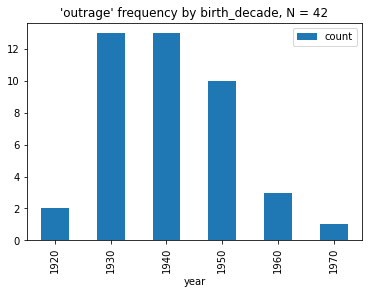

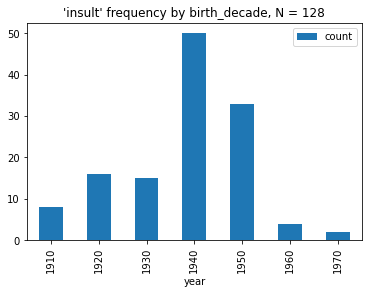

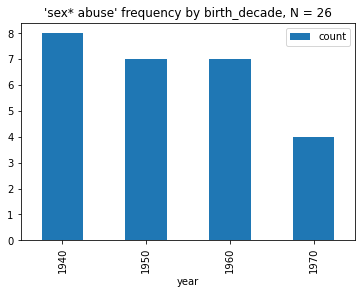

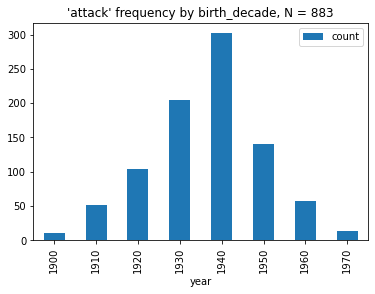

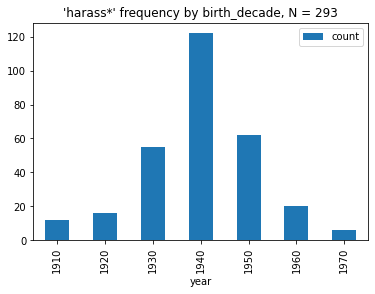

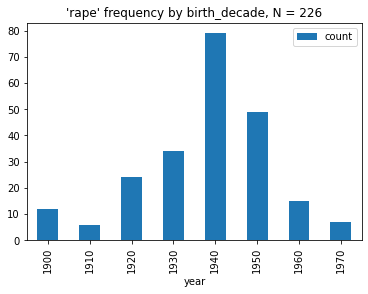

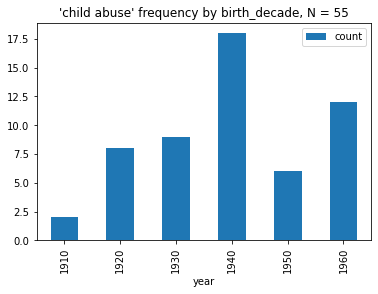

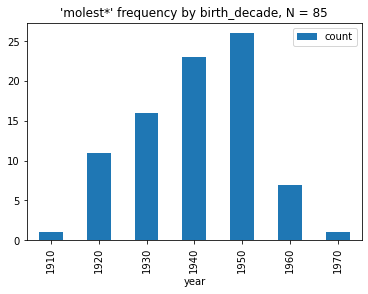

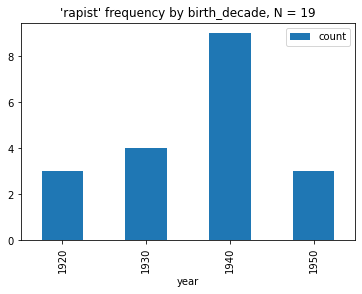

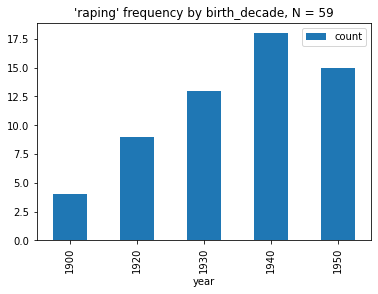

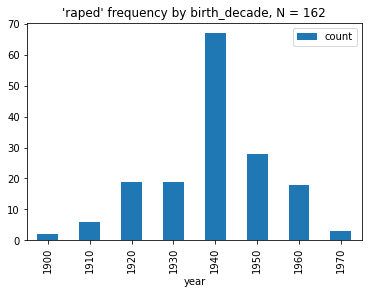

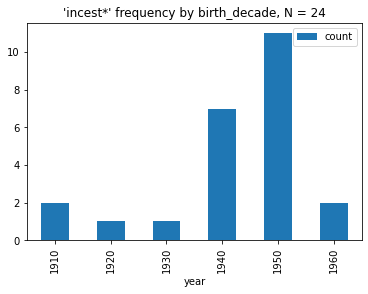

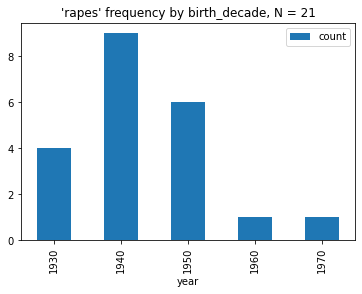

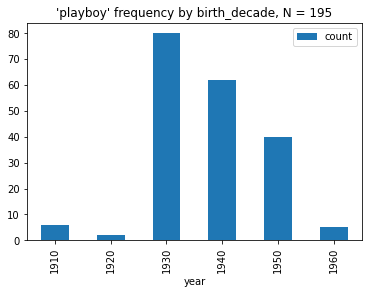

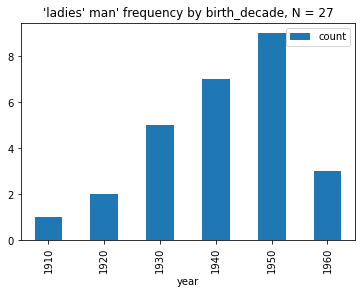

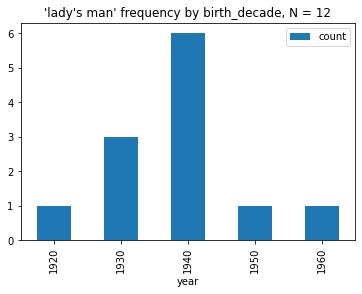

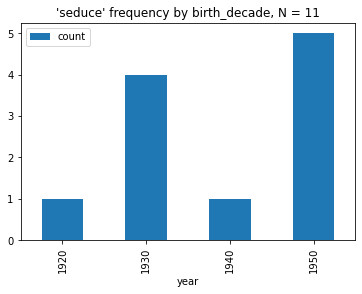

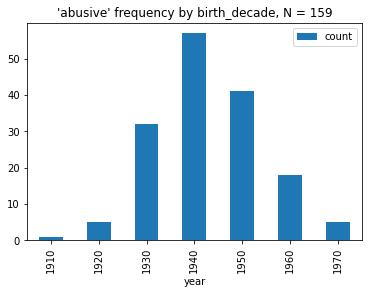

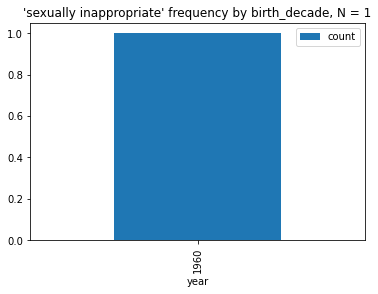

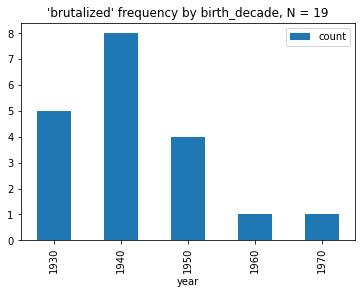

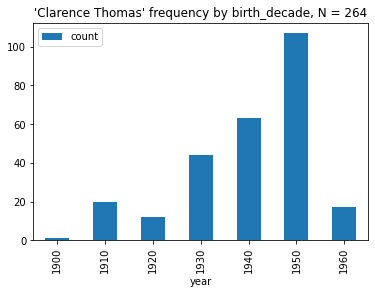

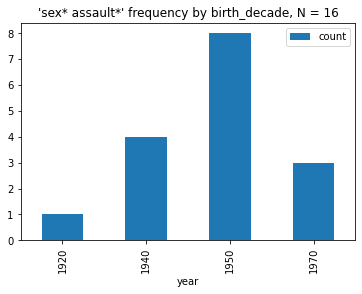

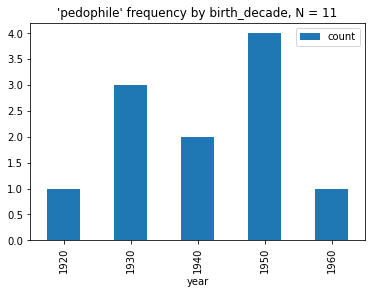

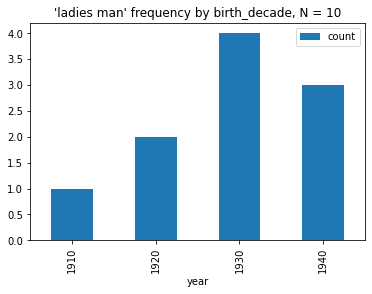

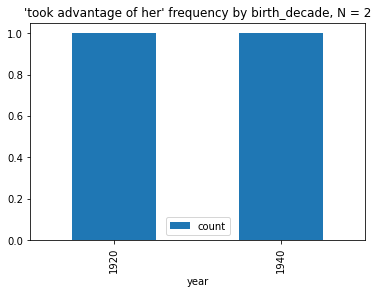

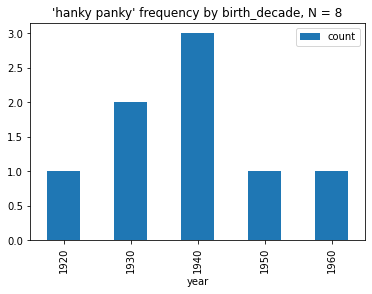

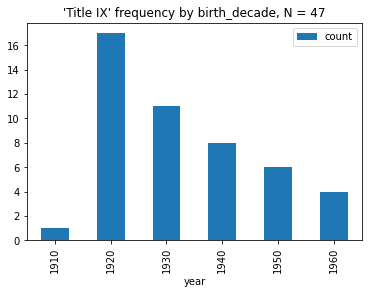

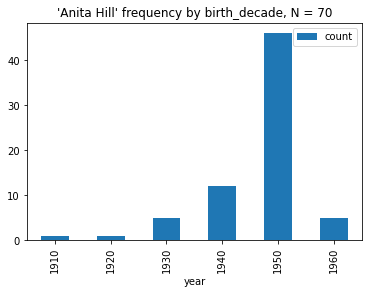

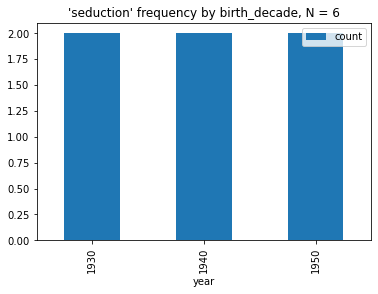

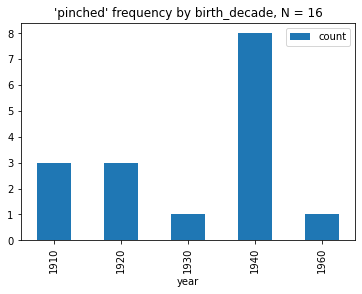

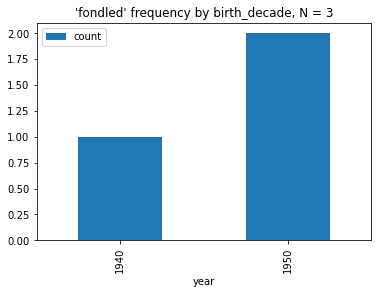

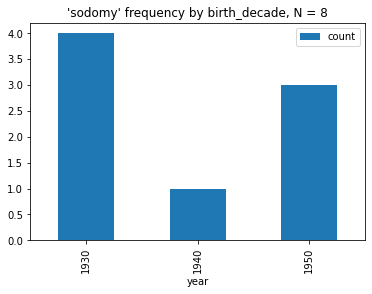

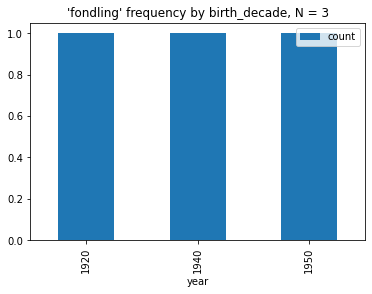

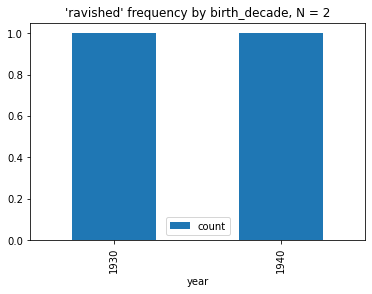

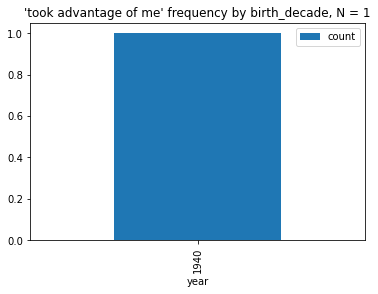

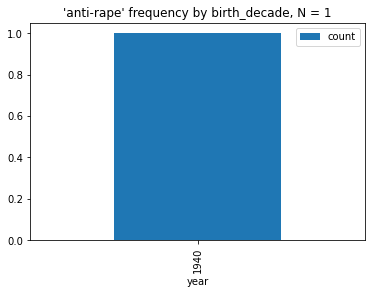

In [206]:
#plot freq by birth decade

for keyword, histmap in runJSON['summary-report']['keywords-by-birth-decade'].items():
    df = make_wordfreq_df(keyword, year_type='keywords-by-birth-decade')
    barplot_frequency_by_year(df, keyword, year_type='birth_decade', saveplot=True, fp=os.path.join(".","rawfreq_birth_decade"))
    


/Users/nicholasgardner/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


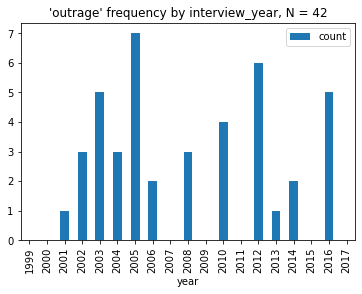

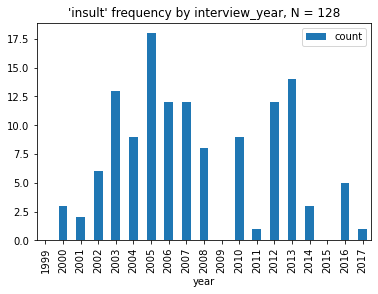

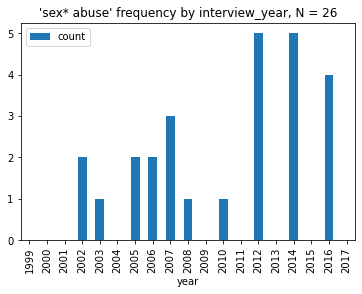

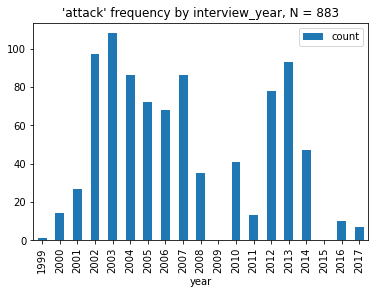

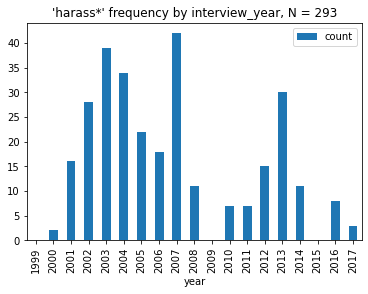

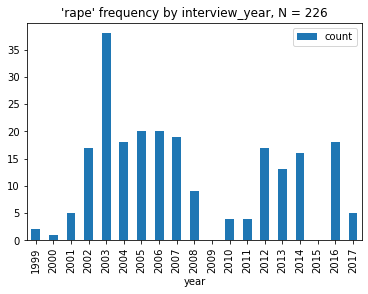

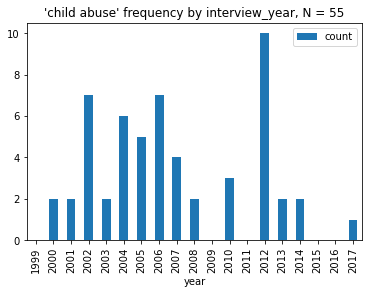

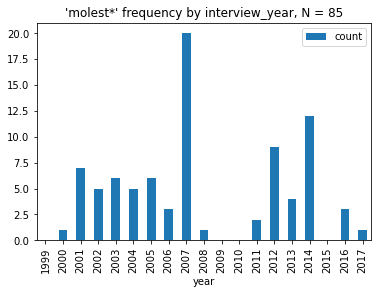

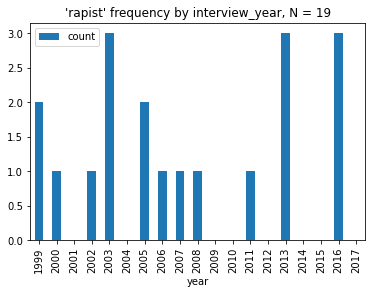

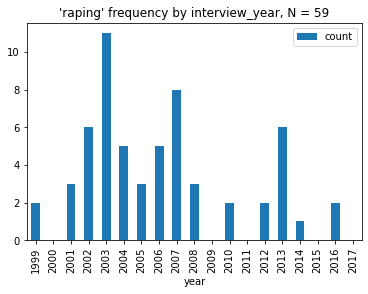

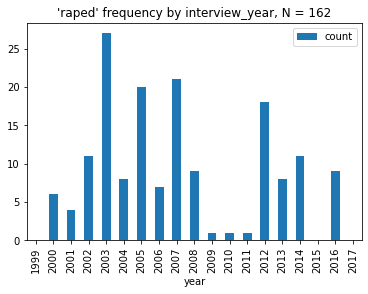

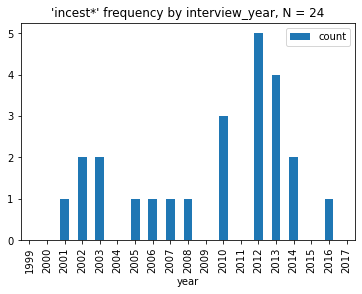

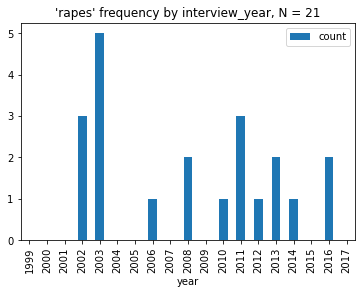

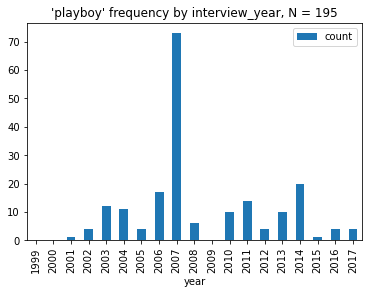

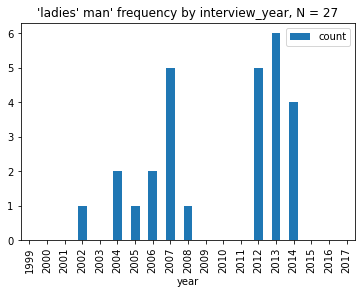

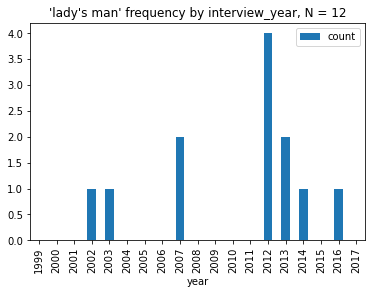

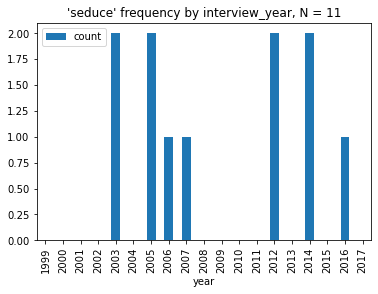

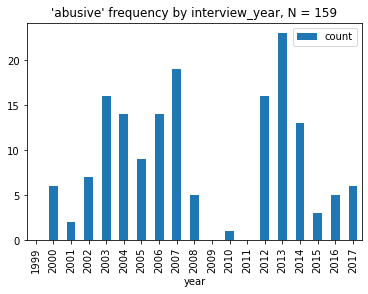

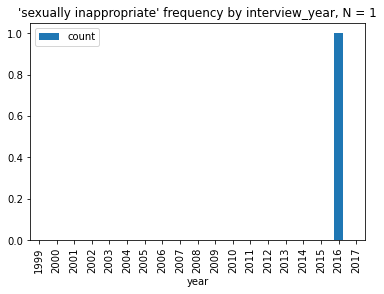

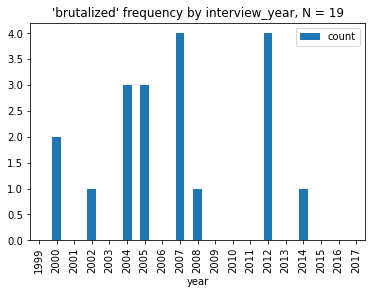

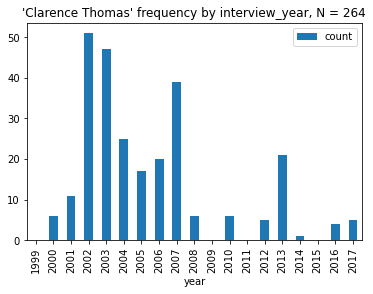

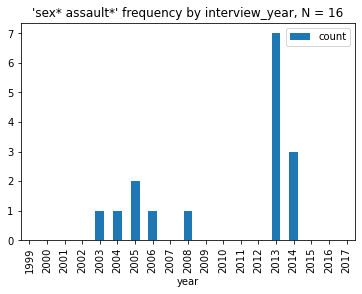

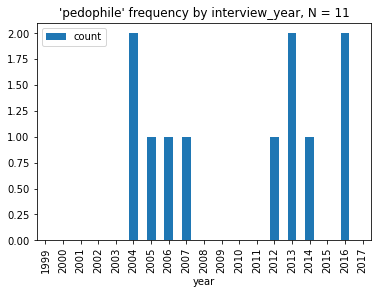

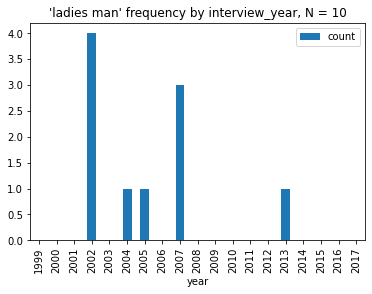

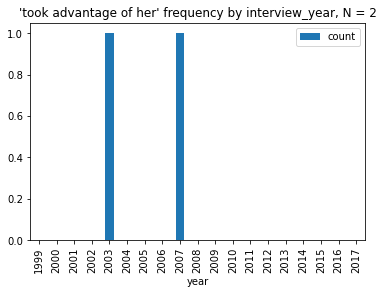

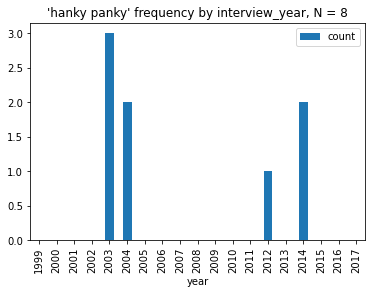

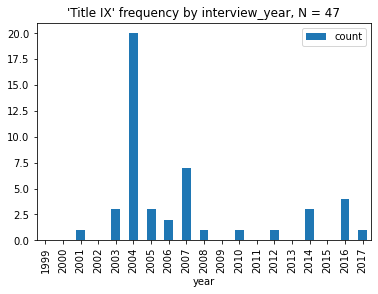

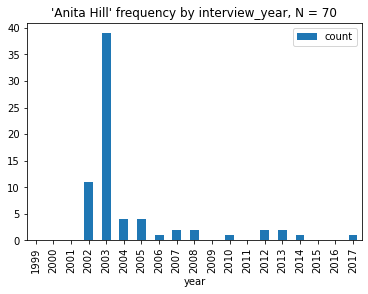

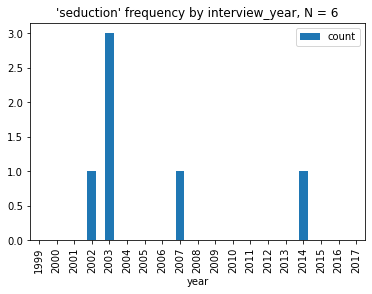

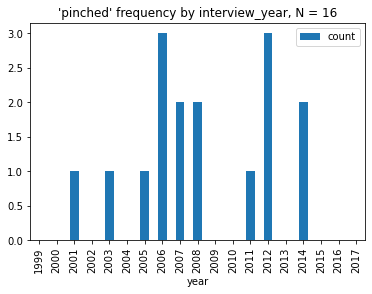

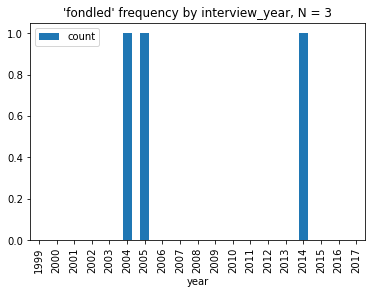

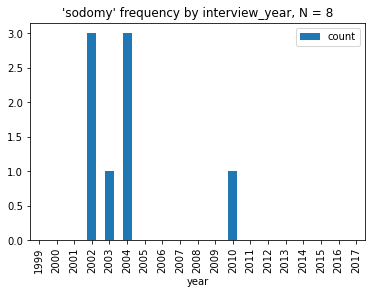

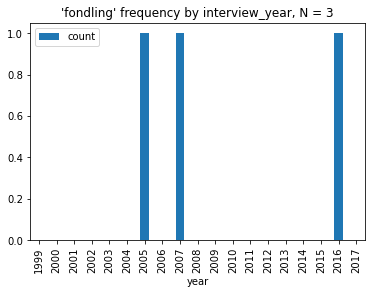

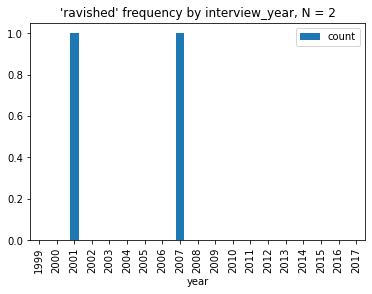

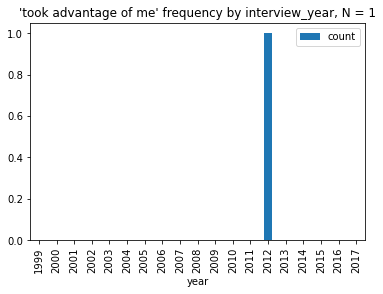

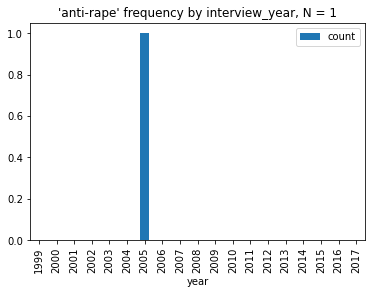

In [205]:
#plot freq by interview year
for keyword, histmap in runJSON['summary-report']['keywords-over-time'].items():
    df = make_wordfreq_df(keyword, year_type='keywords-over-time')
    barplot_frequency_by_year(df, keyword, year_type='interview_year', saveplot=True, fp=os.path.join(".","rawfreq_interview_year"))

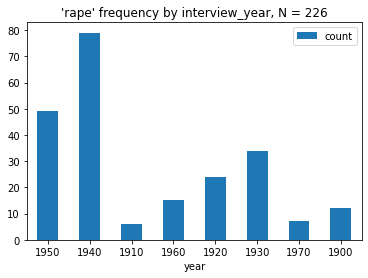

In [170]:
barplot_frequency_by_year(rape_df, 'rape', year_type='interview_year', saveplot=True )

In [117]:
rape_df = pd.DataFrame.from_dict(runJSON['summary-report']['keywords-by-birth-decade']['rape'], columns=['year','count'])

ValueError: cannot use columns parameter with orient='columns'

AttributeError: 'collections.defaultdict' object has no attribute 'plot'

In [74]:
runJSON["individual-reports"]

{'HM - History Makers-rape-keywords-v1': {'id': 'HM - History Makers-rape-keywords-v1',
  'collection': 'HM - History Makers',
  'keyword-list': 'rape-keywords-v1',
  'runDirname': '/Users/nicholasgardner/OHTAP/ohtap_code/data/runs//HM - History Makers-rape-keywords-v1',
  'total-keywords': 46,
  'total-keywords-found': 2915,
  'total-interviews': 1553,
  'total-interviews-with-keywords': 875,
  'time-range-interviews': defaultdict(<function __main__.fill_years.<locals>.<lambda>()>,
              {'Not given': 0,
               1993: 2,
               1994: 0,
               1995: 0,
               1996: 0,
               1997: 0,
               1998: 0,
               1999: 3,
               2000: 29,
               2001: 42,
               2002: 122,
               2003: 158,
               2004: 154,
               2005: 143,
               2006: 103,
               2007: 189,
               2008: 88,
               2009: 1,
               2010: 51,
               2011: 27,
        